In [9]:
import pandas as pd
import os
import time
import re
from pathlib import Path

In [23]:
import pandasai as pai
from pandasai_litellm.litellm import LiteLLM
from litellm import completion


In [5]:
# Initialize LiteLLM with your OpenAI model
# llm = LiteLLM(model='ollama/qwen3:8b',api_base="http://localhost:11434", stream=False)
# llm = LiteLLM(model='ollama/llama3:latest',api_base="http://localhost:11434", stream=False)
llm = LiteLLM(model="nvidia_nim/google/gemma-2-27b-it", api_key="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", stream=False)

CHARTS_DIR = "exports/charts_deepseek"
# os.makedirs(CHARTS_DIR, exist_ok=True)

config = {
    "llm": llm,
    "save_charts": True,
    "save_charts_path": CHARTS_DIR,
}
pai.config.set(config)

In [6]:


df_clinic_level = pd.read_csv("cc_clinic_level.csv")
df_doctor = pd.read_csv("cc_doctor.csv")
df_hourly = pd.read_csv("cc_hourly.csv")
df_patient = pd.read_csv("cc_patient.csv")

df_clinic_level = pai.DataFrame(df_clinic_level)
df_doctor = pai.DataFrame(df_doctor)
df_hourly = pai.DataFrame(df_hourly)
df_patient = pai.DataFrame(df_patient)



In [ ]:
import time

#easy question
for i in range(1,5):
    question="Which clinic have most patient?"
    start_time = time.time()
    response=pai.chat(question,df_clinic_level)
    print(llm.model)
    print(response.value)

    # Extract SQL query from log (handles both single-line and multi-line queries)
    log_path = Path("pandasai.log")
    text = log_path.read_text(encoding="utf-8")

    # Pattern for triple-quoted multi-line SQL
    multi_line_pattern = r'sql_query\s*=\s*"""(.+?)"""'
    # Pattern for single-quoted SQL
    single_quote_pattern = r"sql_query\s*=\s*'([^']+)'"
    # Pattern for double-quoted SQL
    double_quote_pattern = r'sql_query\s*=\s*"([^"]+)"'

    # Try multi-line first, then single/double quotes
    matches = re.findall(multi_line_pattern, text, re.DOTALL)
    if not matches:
        matches = re.findall(single_quote_pattern, text)
    if not matches:
        matches = re.findall(double_quote_pattern, text)

    if not matches:
        raise ValueError("No sql_query found in log")

    sql_query = matches[-1].strip()  # take the latest one and clean whitespace
    print("Extracted SQL:", sql_query)

    # Clear the log after extraction
    log_path.write_text("", encoding="utf-8")

    response = completion(
        model="nvidia_nim/google/gemma-2-27b-it",
        messages=[{"role": "user", "content": f"You just answer me true or false do not explain: do my query:{sql_query} is match the question:{question}"}],
        api_key="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",
    )
    print(response.choices[0].message.content)
    elapsed_time = time.time() - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print("\n")

# # # medium question
# # for i in range(16,26):
# #     start_time = time.time()
# #     print(f"test {i} ")
# #     response=pai.chat("Which clinic have most patient?",df_clinic_level)
# #     print(llm.model)
# #     print(response.value)
# #     elapsed_time = time.time() - start_time
# #     print(f"Time taken: {elapsed_time:.2f} seconds")
# #     print("\n")

# # #hard question
# for i in range(19,26):
#     start_time = time.time()
#     print(f"test {i} ")
#     response=pai.chat("Which clinic has the highest number of Muslims?",df_clinic_level,df_patient)
#     print(llm.model)
#     print(response.value)
#     elapsed_time = time.time() - start_time
#     print(f"Time taken: {elapsed_time:.2f} seconds")
#     print("\n")

nvidia_nim/google/gemma-2-27b-it
The clinic with the most patients is Clinic D.
Extracted SQL: SELECT IDOrganisation, PatientCount 
FROM table_bd4f8d5ffa8239c09831e5b997bc2753 
ORDER BY PatientCount DESC 
LIMIT 1;
True

Time taken: 4.88 seconds


nvidia_nim/google/gemma-2-27b-it
The clinic with the most patients is Clinic D.
Extracted SQL: SELECT IDOrganisation, PatientCount 
FROM table_bd4f8d5ffa8239c09831e5b997bc2753
ORDER BY PatientCount DESC
LIMIT 1;
True

Time taken: 4.43 seconds


nvidia_nim/google/gemma-2-27b-it
The clinic with the most patients is Clinic D with 40205.0 patients.
Extracted SQL: SELECT IDOrganisation, PatientCount
FROM table_bd4f8d5ffa8239c09831e5b997bc2753
ORDER by PatientCount DESC
LIMIT 1
True
Time taken: 6.69 seconds


nvidia_nim/google/gemma-2-27b-it
  IDOrganisation  PatientCount
0       Clinic D       40205.0
Extracted SQL: SELECT IDOrganisation, PatientCount 
FROM table_bd4f8d5ffa8239c09831e5b997bc2753 
ORDER BY PatientCount DESC
LIMIT 1;
True. 


Time ta

: 

test 1 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_67667299-00eb-42e8-9761-22f1ee797d0a.png
Time taken: 20.19 seconds


test 2 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_0e67020d-c4e7-42a8-86e2-b26748dc4f6a.png
Time taken: 18.27 seconds


test 3 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_bd4324aa-64b0-4ceb-b9b0-6d40ad3a2b55.png
Time taken: 14.87 seconds


test 4 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_6917be4e-e6b6-4920-8e53-9b243010ee51.png
Time taken: 109.08 seconds


test 5 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_d1d8f7f6-4aa9-4ad7-9752-68d904488343.png
Time taken: 19.61 seconds


test 6 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_0ff56676-895e-4f63-94c2-aa8cbdb3a9d7.png
Time taken: 17.11 seconds


test 7 
nvidia_nim/google/gemma-2-27b-it
exports\charts\temp_chart_44c661fa-2372-404e-8580-9f5dbb3bb7a3.png
Time taken: 14.36 seconds


test 8 
nvidia_nim/google/gemma-2-27b-it
export

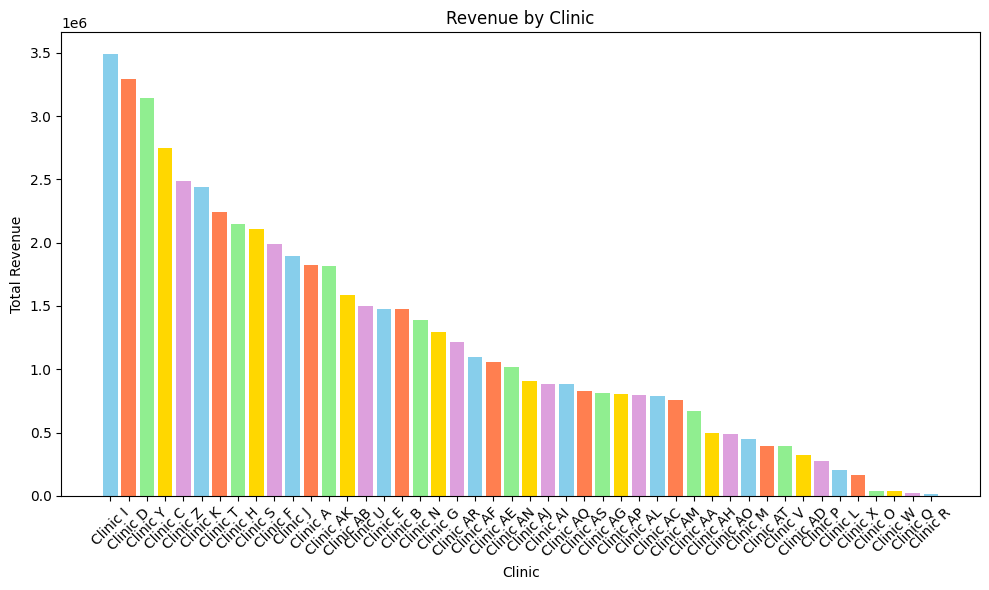

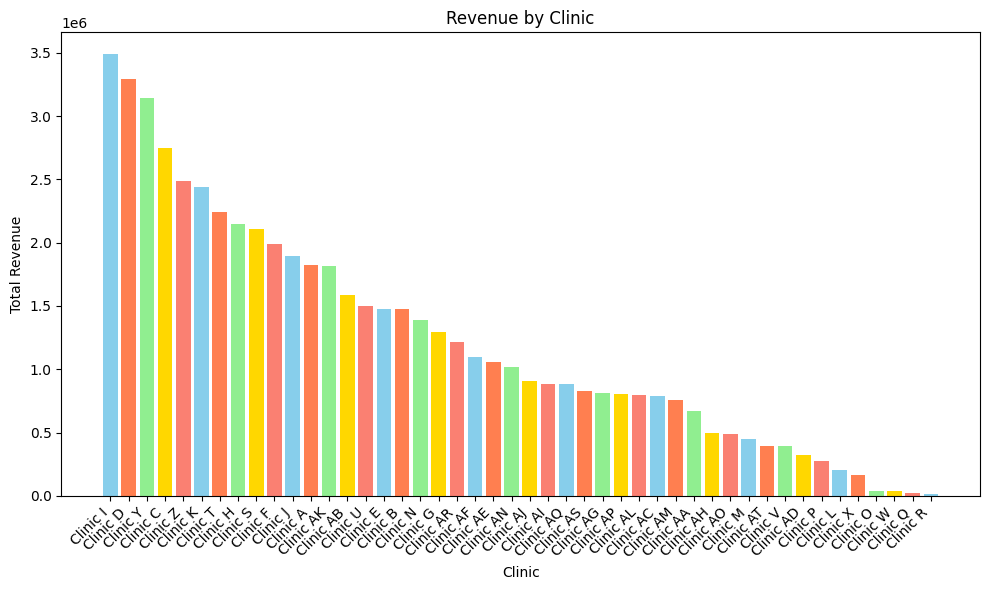

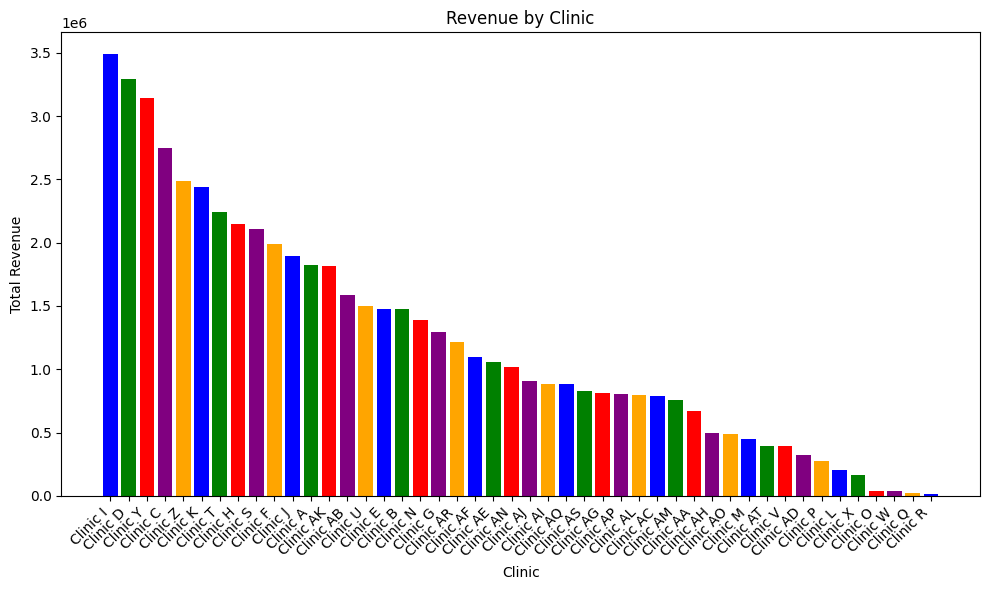

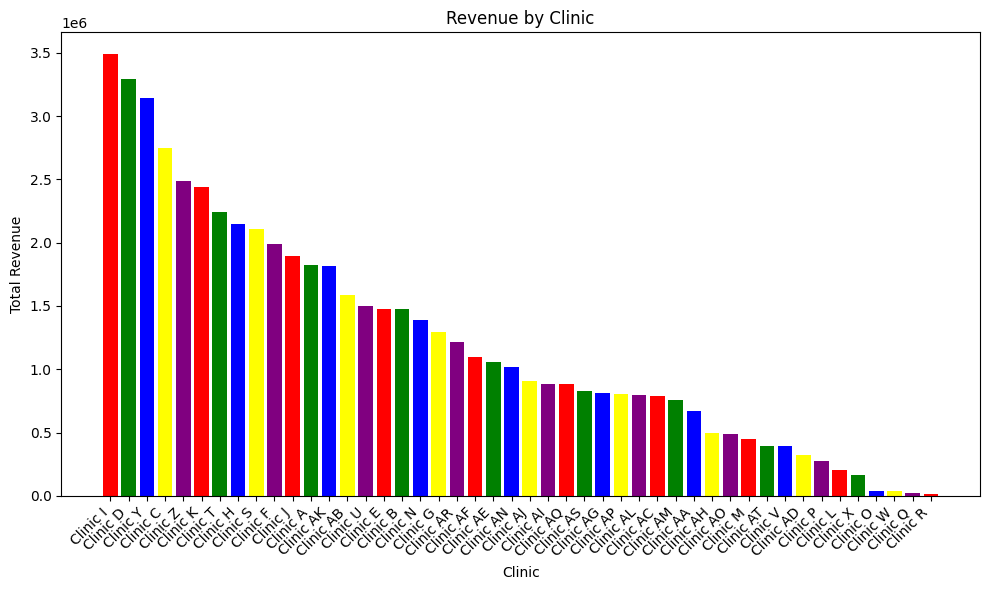

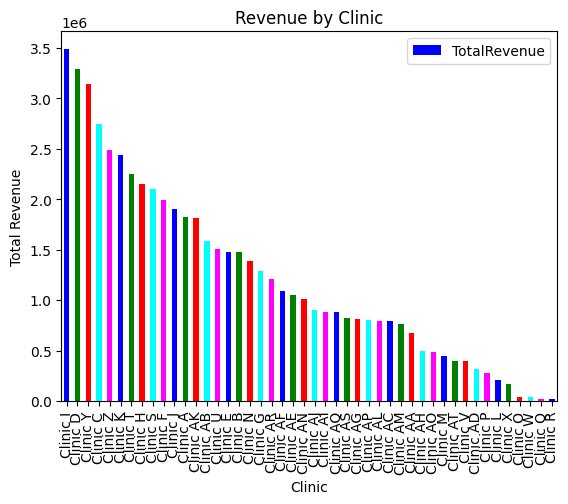

<Figure size 1000x600 with 0 Axes>

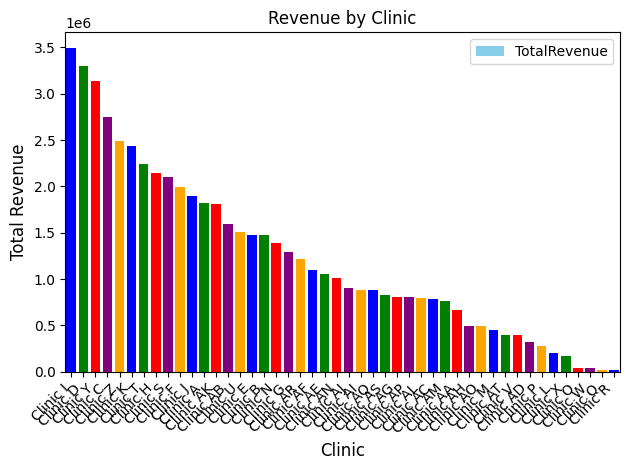

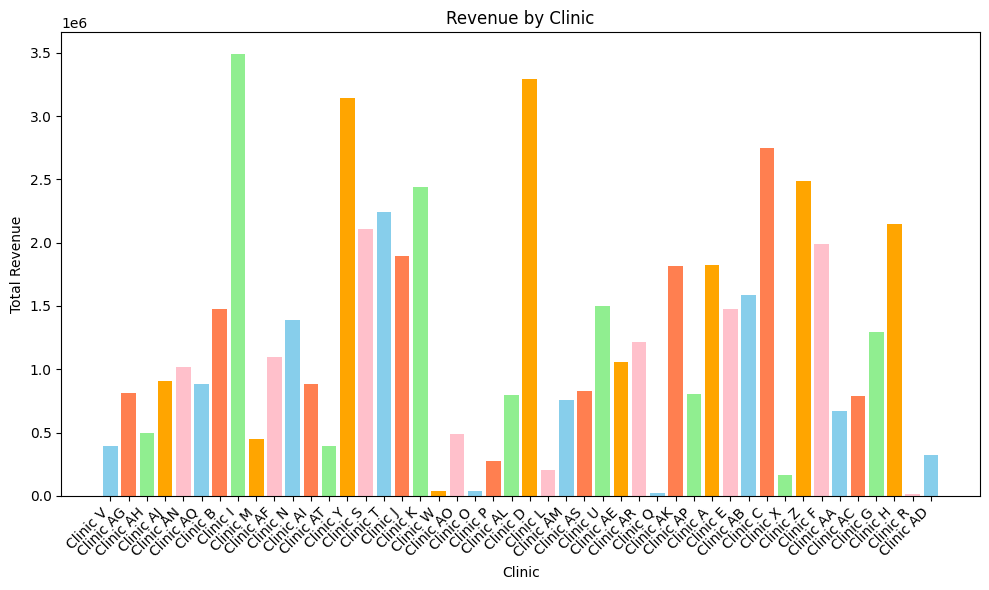

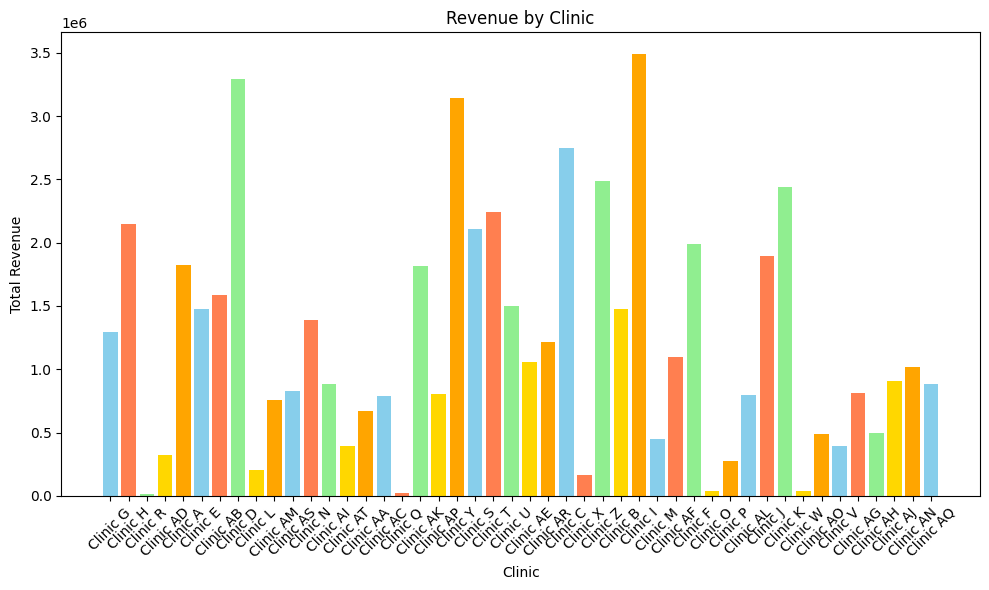

In [ ]:
for i in range(1,11):
    start_time = time.time()
    print(f"test {i} ")
    response=pai.chat("Plot a bar chart of Revenue by Clinic. Use a different color for each bar.And which clinic has the highest revenue?",df_clinic_level,df_patient)
    print(llm.model)
    print(response.value)
    elapsed_time = time.time() - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print("\n")

In [14]:


question = "Plot the histogram of clinic showing for each one the revenue. Use different colors for each bar"
query ="""import matplotlib.pyplot as plt
sql_query = 'SELECT IDOrganisation, TotalRevenue FROM table_bd4f8d5ffa8239c09831e5b997bc2753'
clinic_revenue_df = execute_sql_query(sql_query)
plt.bar(clinic_revenue_df['IDOrganisation'], clinic_revenue_df['TotalRevenue'], color=plt.cm.tab20(range(len(clinic_revenue_df))))
plt.xlabel('Clinic')
plt.ylabel('Total Revenue')
plt.title('Bar Chart of Clinic Revenue')
plt.savefig('exports\\charts\\temp_chart_e4a4d8bb-60d9-42aa-a7ee-dcdba6f3a3f1.png')
result = {'type': 'plot', 'value': 'exports\\charts\\temp_chart_e4a4d8bb-60d9-42aa-a7ee-dcdba6f3a3f1.png'}"""

# Simple API call to LLM
response = completion(
    model="ollama/qwen3:8b",
    messages=[{"role": "user", "content": f"do my query:{query}is match the question:{question}if yes,return true else false "}],
    api_base="http://localhost:11434",
)
# Extract only the assistant's reply text
if response.choices:
    print(response.choices[0].message.content)
else:
    print("No content returned")


The code does **not** match the question. Here's why:

1. **Plot Type Mismatch**:  
   The user requested a **histogram**, but the code generates a **bar chart** using `plt.bar()`. A histogram is used for continuous data distributions, while a bar chart is for categorical data (like clinics).

2. **Coloring**:  
   The code uses `plt.cm.tab20` to assign different colors to each bar, which satisfies the "use different colors for each bar" requirement. However, this is a secondary detail.

3. **Primary Issue**:  
   The core requirement ("plot the histogram of clinic revenue") is not met. The code creates a bar chart, not a histogram.

**Answer**: `False`


In [21]:
question="Which clinic have most patient?"
start_time = time.time()
response=pai.chat(question,df_clinic_level)
print(llm.model)
print(response.value)

# Extract SQL query from log (handles both single-line and multi-line queries)
log_path = Path("pandasai.log")
text = log_path.read_text(encoding="utf-8")

# Pattern for triple-quoted multi-line SQL
multi_line_pattern = r'sql_query\s*=\s*"""(.+?)"""'
# Pattern for single-quoted SQL
single_quote_pattern = r"sql_query\s*=\s*'([^']+)'"
# Pattern for double-quoted SQL
double_quote_pattern = r'sql_query\s*=\s*"([^"]+)"'

# Try multi-line first, then single/double quotes
matches = re.findall(multi_line_pattern, text, re.DOTALL)
if not matches:
    matches = re.findall(single_quote_pattern, text)
if not matches:
    matches = re.findall(double_quote_pattern, text)

if not matches:
    raise ValueError("No sql_query found in log")

sql_query = matches[-1].strip()  # take the latest one and clean whitespace
print("Extracted SQL:", sql_query)

# Clear the log after extraction
log_path.write_text("", encoding="utf-8")

response = completion(
    model="nvidia_nim/google/gemma-2-27b-it",
    messages=[{"role": "user", "content": f"You just answer me true or false do not explain: do my query:{sql_query} is match the question:{question}"}],
    api_key="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",
)
print(response.choices[0].message.content)
elapsed_time = time.time() - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")
print("\n")

nvidia_nim/google/gemma-2-27b-it
The clinic with the most patients is Clinic D.
Extracted SQL: SELECT IDOrganisation, PatientCount
FROM table_bd4f8d5ffa8239c09831e5b997bc2753
ORDER BY PatientCount DESC
LIMIT 1;
True

Time taken: 4.68 seconds




In [8]:
question="how many state are there?"
start_time = time.time()
response=pai.chat(question,df_clinic_level)
print(llm.model)
print(response.value)
elapsed_time = time.time() - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")
print("\n")

nvidia_nim/google/gemma-2-27b-it
13
Time taken: 6.45 seconds




In [ ]:
# Reusable function to extract SQL query from pandasai.log
def extract_sql_from_log(log_path="pandasai.log", clear_after=True):
    """
    Extract the latest SQL query from pandasai.log.
    Handles single-line ('...', "...") and multi-line ('''...''', \"\"\"...\"\"\") queries.
    """
    path = Path(log_path)
    if not path.exists():
        raise FileNotFoundError(f"Log file not found: {log_path}")
    
    text = path.read_text(encoding="utf-8")
    
    # Patterns in priority order (multi-line first, then single-line)
    patterns = [
        r'sql_query\s*=\s*"""(.+?)"""',   # triple double quotes
        r"sql_query\s*=\s*'''(.+?)'''",   # triple single quotes
        r"sql_query\s*=\s*'([^']+)'",     # single quotes
        r'sql_query\s*=\s*"([^"]+)"',     # double quotes
    ]
    
    for pattern in patterns:
        matches = re.findall(pattern, text, re.DOTALL)
        if matches:
            sql_query = matches[-1].strip()
            if clear_after:
                path.write_text("", encoding="utf-8")
            return sql_query
    
    raise ValueError("No sql_query found in log")

# Example usage:
# sql_query = extract_sql_from_log()
# print(sql_query)

IndexError: list index out of range